In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Wyoming County Community Hospital 1.csv')
df

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Emergency Department Indicator,Total Charges,Total Costs,Lost Revenues
0,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,50 to 69,140,M,White,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,NaN,Y,15028.17,8596.14,6432.03
1,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,70 or Older,140,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,NaN,Y,12290.79,5953.80,6336.99
2,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,50 to 69,140,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,NaN,N,7213.53,4295.55,2917.98
3,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,30 to 49,144,F,White,Not Span/Hispanic,...,Minor,Medical,Self-Pay,NaN,NaN,NaN,Y,8140.56,4445.45,3695.11
4,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,30 to 49,144,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,NaN,Y,8233.24,4438.56,3794.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Surgical,Medicare,NaN,NaN,NaN,Y,16503.27,9826.68,6676.59
2062,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,50 to 69,145,F,White,Not Span/Hispanic,...,Minor,Medical,Blue Cross/Blue Shield,Self-Pay,NaN,NaN,Y,12451.43,17022.72,-4571.29
2063,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,70 or Older,145,F,White,Not Span/Hispanic,...,Extreme,Medical,Medicare,NaN,NaN,NaN,Y,12689.77,8428.33,4261.44
2064,Western NY,Wyoming,6027000,1153,Wyoming County Community Hospital,50 to 69,140,M,White,Not Span/Hispanic,...,Major,Medical,Medicaid,NaN,NaN,NaN,Y,9784.83,5213.77,4571.06


<Axes: >

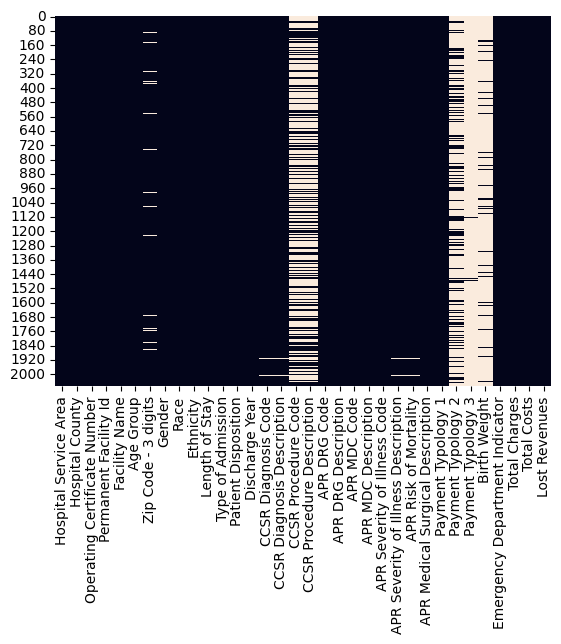

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

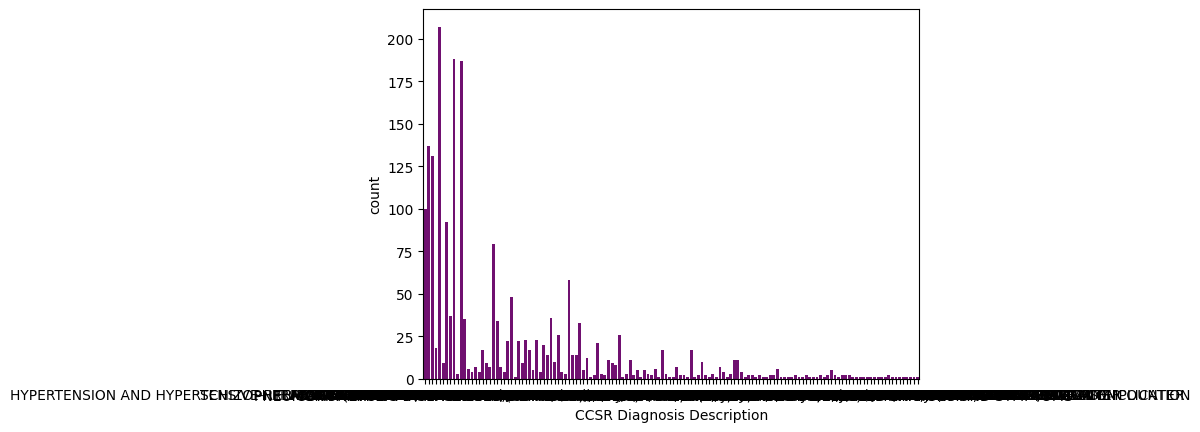

In [ ]:
ax=sns.countplot(x='CCSR Diagnosis Description',data=df ,color='purple')

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(percent_missing)

Hospital Service Area                   0.000000
Hospital County                         0.000000
Operating Certificate Number            0.000000
Permanent Facility Id                   0.000000
Facility Name                           0.000000
Age Group                               0.000000
Zip Code - 3 digits                     3.727009
Gender                                  0.000000
Race                                    0.000000
Ethnicity                               0.000000
Length of Stay                          0.000000
Type of Admission                       0.000000
Patient Disposition                     0.000000
Discharge Year                          0.000000
CCSR Diagnosis Code                     0.677638
CCSR Diagnosis Description              0.677638
CCSR Procedure Code                    60.406583
CCSR Procedure Description             60.406583
APR DRG Code                            0.000000
APR DRG Description                     0.000000
APR MDC Code        

In [ ]:
df = df.drop(['Zip Code - 3 digits','Payment Typology 1',	'Payment Typology 2',	'Payment Typology 3',	'Birth Weight','CCSR Diagnosis Code','CCSR Procedure Code','CCSR Procedure Description','Hospital Service Area','Hospital County'],axis=1)

In [ ]:
df = df.drop(['APR MDC Code','APR MDC Description','APR Severity of Illness Description','Patient Disposition','Race','APR Risk of Mortality'],axis=1)

In [ ]:
df = df.drop(['Permanent Facility Id','Facility Name','Ethnicity','Discharge Year','APR DRG Code','APR DRG Description', 'Operating Certificate Number'],axis=1)

In [ ]:
df = df.drop(['CCSR Diagnosis Description'],axis=1)

In [ ]:
df

,Age Group,Gender,Length of Stay,Type of Admission,APR Severity of Illness Code,APR Medical Surgical Description,Emergency Department Indicator,Total Charges,Total Costs,Lost Revenues
0,50 to 69,M,11,Emergency,2,Medical,Y,15028.17,8596.14,6432.03
1,70 or Older,F,3,Emergency,3,Medical,Y,12290.79,5953.80,6336.99
2,50 to 69,F,6,Emergency,2,Medical,N,7213.53,4295.55,2917.98
3,30 to 49,F,6,Emergency,1,Medical,Y,8140.56,4445.45,3695.11
4,30 to 49,F,6,Emergency,1,Medical,Y,8233.24,4438.56,3794.68
...,...,...,...,...,...,...,...,...,...,...
2061,70 or Older,F,3,Emergency,1,Surgical,Y,16503.27,9826.68,6676.59
2062,50 to 69,F,3,Emergency,1,Medical,Y,12451.43,17022.72,-4571.29
2063,70 or Older,F,1,Emergency,4,Medical,Y,12689.77,8428.33,4261.44
2064,50 to 69,M,3,Emergency,3,Medical,Y,9784.83,5213.77,4571.06


In [ ]:
df['Gender'].replace(['M', 'F'],[0, 1], inplace=True)

In [ ]:
df['Type of Admission'].replace([ 'Elective','Emergency','Newborn','Urgent'],[ 1, 2,  3, 4], inplace=True)

In [ ]:
df['Emergency Department Indicator'].replace(['Y', 'N'],[0, 1], inplace=True)

In [ ]:
df['Gender'].replace(['M', 'F'],[0, 1], inplace=True)

In [ ]:
df['Emergency Department Indicator'].replace(['Y', 'N'],[1, 0], inplace=True)

In [ ]:
df['APR Medical Surgical Description'].replace(['Not Applicable', 'Medical', 'Surgical'],[0, 1, 2], inplace=True)

In [ ]:
df['Age Group'].replace(['18 to 29', '0 to 17'],[0, 0], inplace=True)
df['Age Group'].replace(['30 to 49', '50 to 69', '70 or Older'],[0, 1, 1], inplace=True)


In [ ]:
df

,Age Group,Gender,Length of Stay,Type of Admission,APR Severity of Illness Code,APR Medical Surgical Description,Emergency Department Indicator,Total Charges,Total Costs,Lost Revenues
0,1,0,11,2,2,1,0,15028.17,8596.14,6432.03
1,1,1,3,2,3,1,0,12290.79,5953.80,6336.99
2,1,1,6,2,2,1,1,7213.53,4295.55,2917.98
3,0,1,6,2,1,1,0,8140.56,4445.45,3695.11
4,0,1,6,2,1,1,0,8233.24,4438.56,3794.68
...,...,...,...,...,...,...,...,...,...,...
2061,1,1,3,2,1,2,0,16503.27,9826.68,6676.59
2062,1,1,3,2,1,1,0,12451.43,17022.72,-4571.29
2063,1,1,1,2,4,1,0,12689.77,8428.33,4261.44
2064,1,0,3,2,3,1,0,9784.83,5213.77,4571.06


<Axes: >

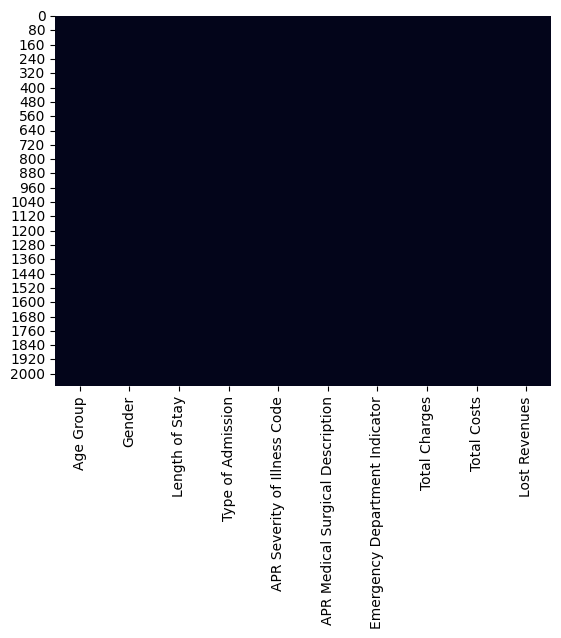

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age Group                         2066 non-null   int64  
 1   Gender                            2066 non-null   int64  
 2   Length of Stay                    2066 non-null   int64  
 3   Type of Admission                 2066 non-null   int64  
 4   APR Severity of Illness Code      2066 non-null   int64  
 5   APR Medical Surgical Description  2066 non-null   int64  
 6   Emergency Department Indicator    2066 non-null   int64  
 7   Total Charges                     2066 non-null   float64
 8   Total Costs                       2066 non-null   float64
 9   Lost Revenues                     2066 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 161.5 KB


In [ ]:
df['Length of Stay']= df['Length of Stay'].astype(int)
df['Total Charges'] = df['Total Charges'].astype(int)
df['Total Costs'] = df['Total Costs'].astype(int)
df['Lost Revenues'] = df['Lost Revenues'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Age Group                         2066 non-null   int64
 1   Gender                            2066 non-null   int64
 2   Length of Stay                    2066 non-null   int64
 3   Type of Admission                 2066 non-null   int64
 4   APR Severity of Illness Code      2066 non-null   int64
 5   APR Medical Surgical Description  2066 non-null   int64
 6   Emergency Department Indicator    2066 non-null   int64
 7   Total Charges                     2066 non-null   int64
 8   Total Costs                       2066 non-null   int64
 9   Lost Revenues                     2066 non-null   int64
dtypes: int64(10)
memory usage: 161.5 KB


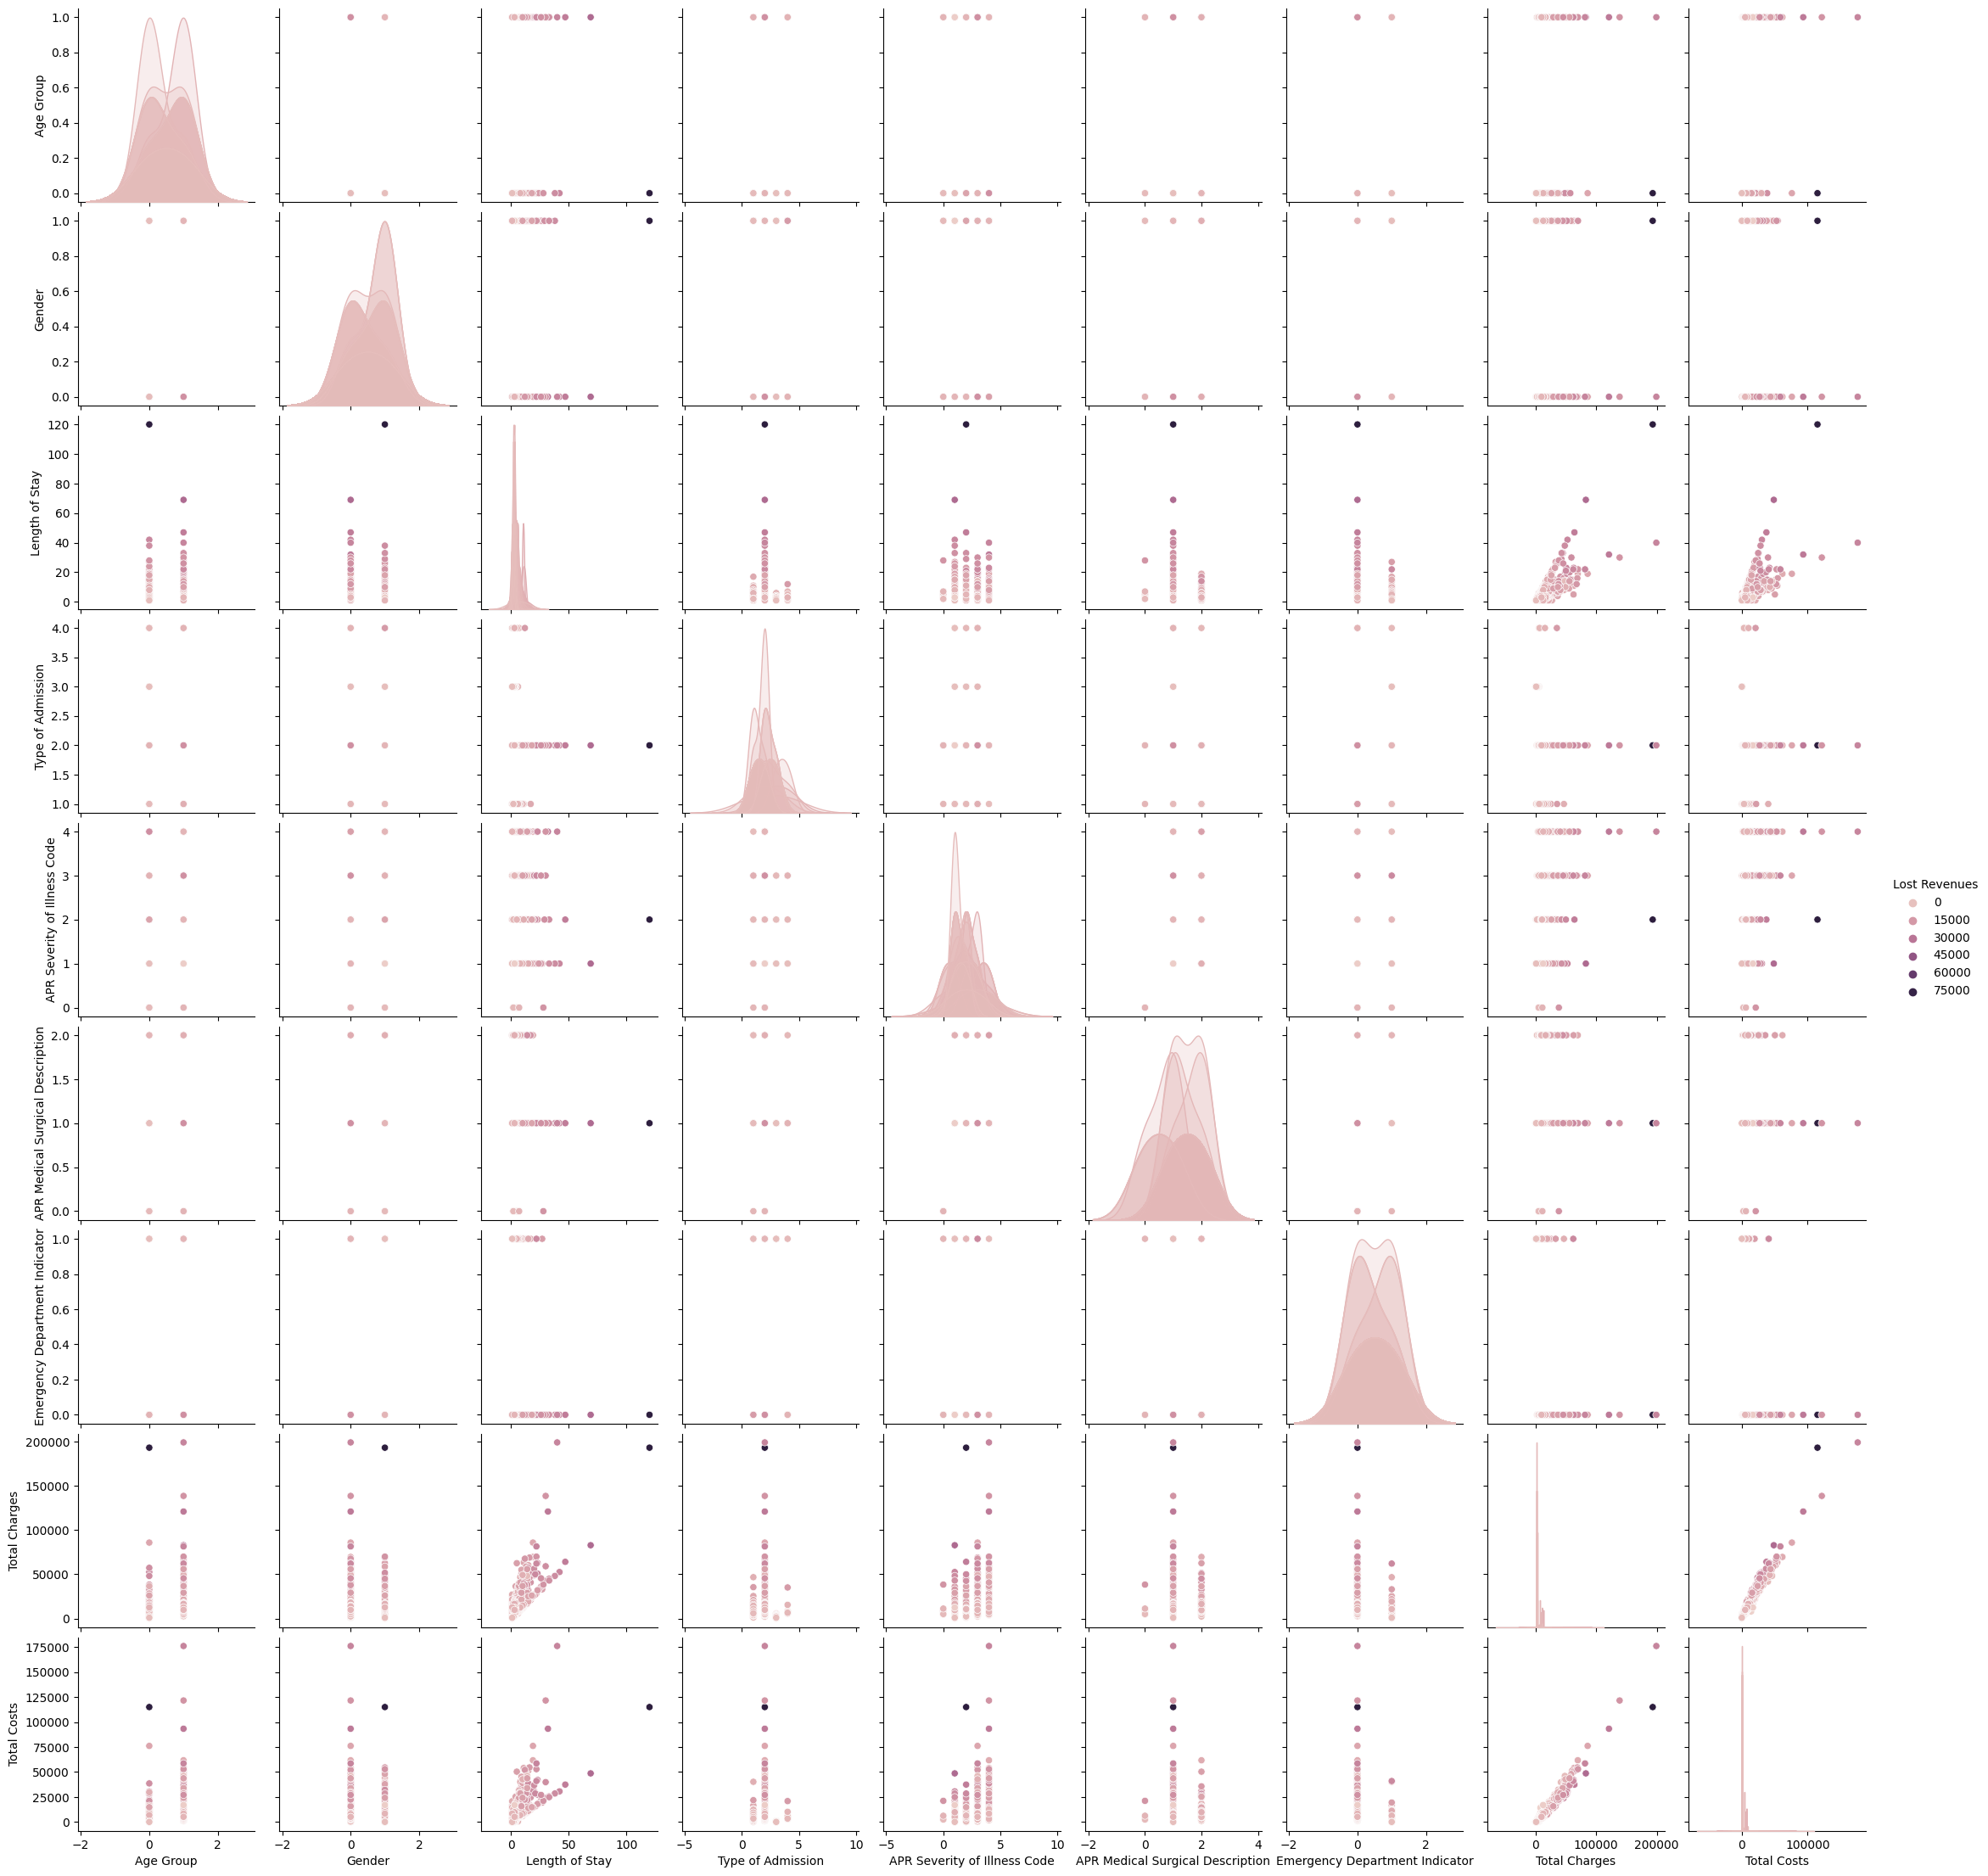

In [ ]:
sns.pairplot(df, hue = 'Lost Revenues')

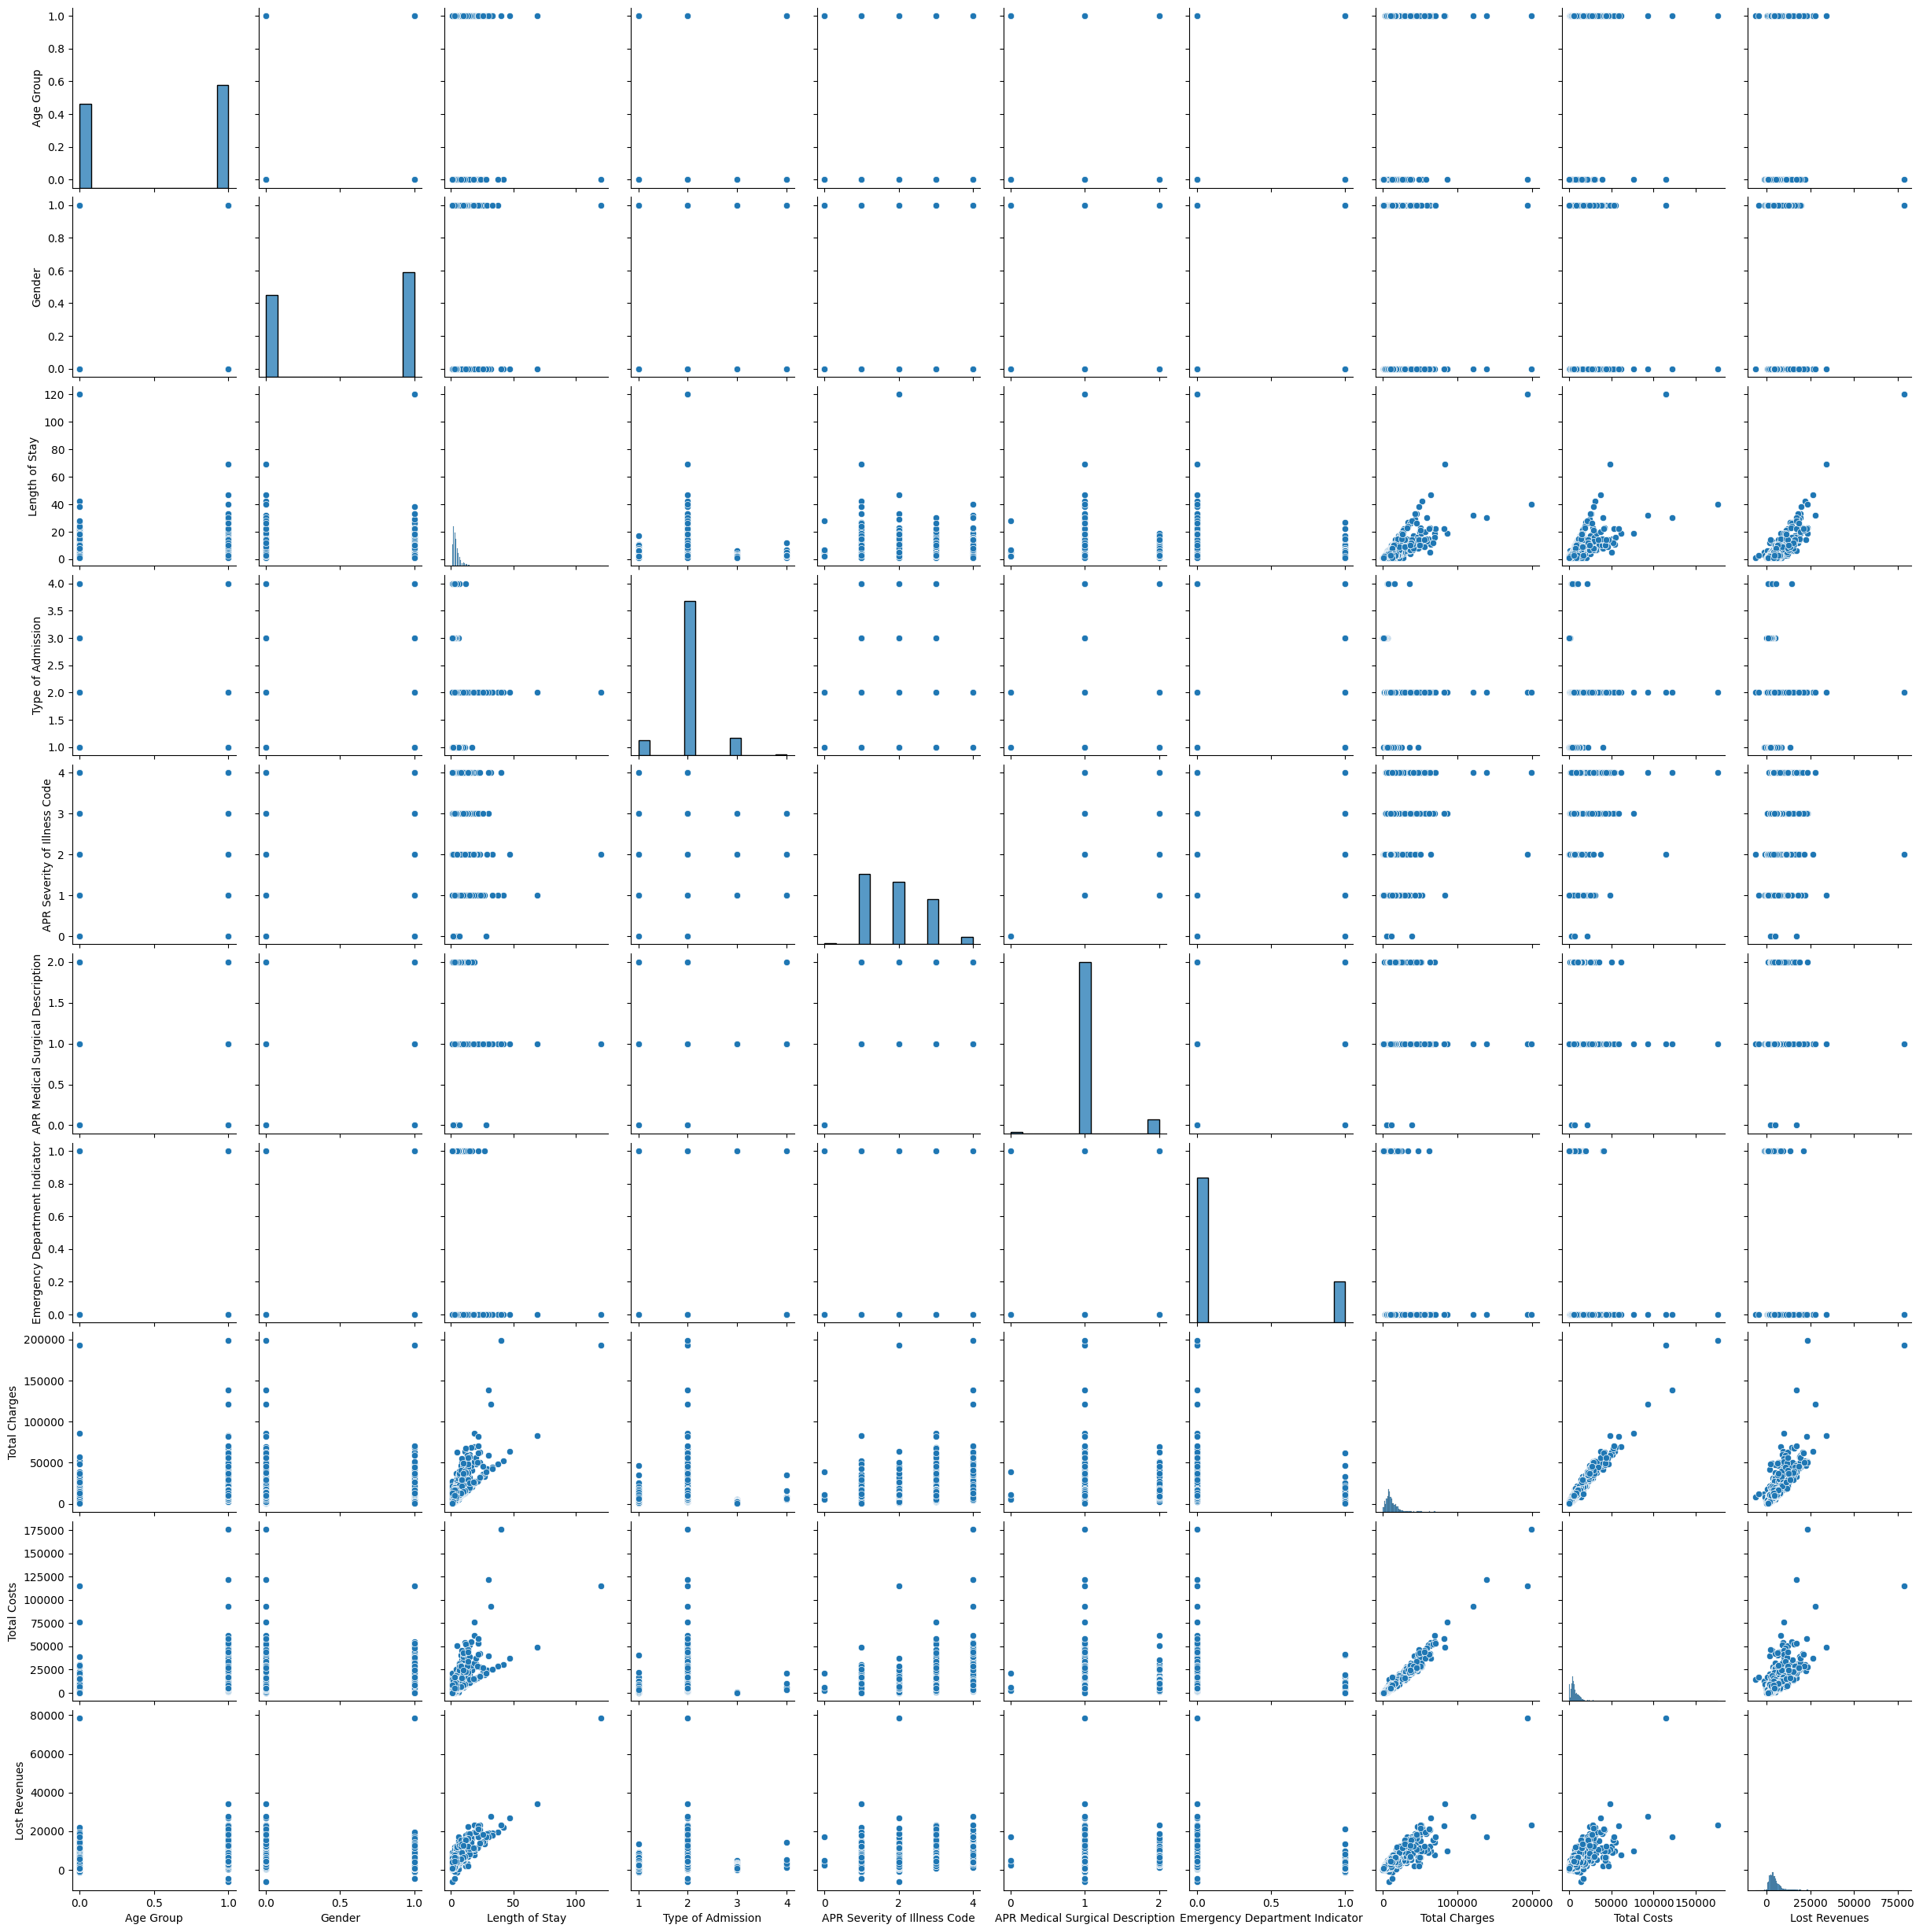

In [ ]:
# Build pairplot
sns.pairplot(df)

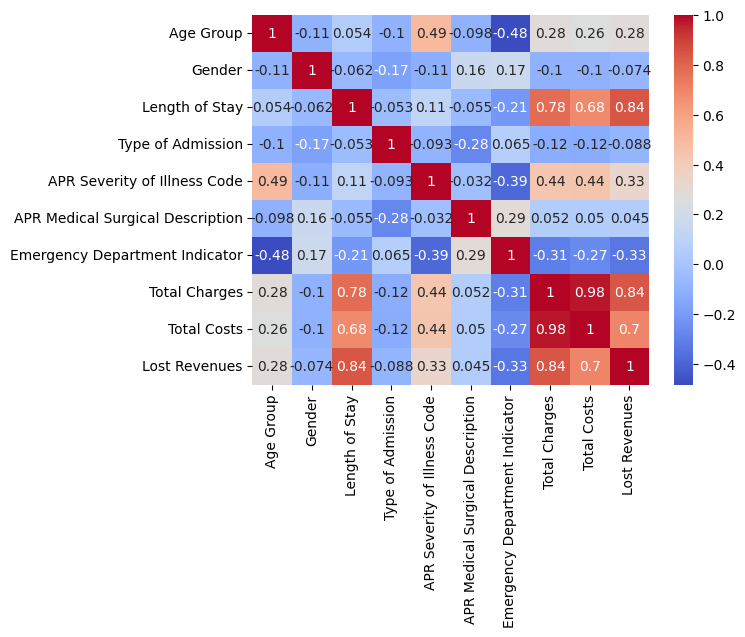

In [ ]:
# Assess the information value of individual features
from matplotlib import pyplot as plt

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
df.corr()

,Age Group,Gender,Length of Stay,Type of Admission,APR Severity of Illness Code,APR Medical Surgical Description,Emergency Department Indicator,Total Charges,Total Costs,Lost Revenues
Age Group,1.000000,-0.105088,0.053573,-0.101005,0.494817,-0.098028,-0.482448,0.280905,0.257208,0.278034
Gender,-0.105088,1.000000,-0.062326,-0.171772,-0.112053,0.156997,0.166428,-0.100864,-0.102833,-0.073987
Length of Stay,0.053573,-0.062326,1.000000,-0.053073,0.109687,-0.054626,-0.210776,0.777290,0.682742,0.840813
Type of Admission,-0.101005,-0.171772,-0.053073,1.000000,-0.093144,-0.277062,0.064831,-0.121495,-0.124499,-0.087571
APR Severity of Illness Code,0.494817,-0.112053,0.109687,-0.093144,1.000000,-0.031731,-0.385356,0.436480,0.439560,0.333609
APR Medical Surgical Description,-0.098028,0.156997,-0.054626,-0.277062,-0.031731,1.000000,0.289611,0.051778,0.049981,0.044903
Emergency Department Indicator,-0.482448,0.166428,-0.210776,0.064831,-0.385356,0.289611,1.000000,-0.305975,-0.267735,-0.333494
Total Charges,0.280905,-0.100864,0.777290,-0.121495,0.436480,0.051778,-0.305975,1.000000,0.975726,0.841589
Total Costs,0.257208,-0.102833,0.682742,-0.124499,0.439560,0.049981,-0.267735,0.975726,1.000000,0.702878
Lost Revenues,0.278034,-0.073987,0.840813,-0.087571,0.333609,0.044903,-0.333494,0.841589,0.702878,1.000000


In [ ]:
df['Total Charges'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       15028
1       12290
2        7213
3        8140
4        8233
        ...  
2061    16503
2062    12451
2063    12689
2064     9784
2065    45557
Name: Total Charges, Length: 2066, dtype: int64>

In [ ]:
df['Total Charges'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       15028
1       12290
2        7213
3        8140
4        8233
        ...  
2061    16503
2062    12451
2063    12689
2064     9784
2065    45557
Name: Total Charges, Length: 2066, dtype: int64>

In [ ]:
df['Length of Stay'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       11
1        3
2        6
3        6
4        6
        ..
2061     3
2062     3
2063     1
2064     3
2065    26
Name: Length of Stay, Length: 2066, dtype: int64>

In [ ]:
df['Length of Stay'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       11
1        3
2        6
3        6
4        6
        ..
2061     3
2062     3
2063     1
2064     3
2065    26
Name: Length of Stay, Length: 2066, dtype: int64>

In [ ]:
df['Total Costs'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        8596
1        5953
2        4295
3        4445
4        4438
        ...  
2061     9826
2062    17022
2063     8428
2064     5213
2065    27105
Name: Total Costs, Length: 2066, dtype: int64>

In [ ]:
df['Total Costs'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        8596
1        5953
2        4295
3        4445
4        4438
        ...  
2061     9826
2062    17022
2063     8428
2064     5213
2065    27105
Name: Total Costs, Length: 2066, dtype: int64>

In [ ]:
df['Lost Revenues'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        6432
1        6336
2        2917
3        3695
4        3794
        ...  
2061     6676
2062    -4571
2063     4261
2064     4571
2065    18451
Name: Lost Revenues, Length: 2066, dtype: int64>

In [ ]:
df['Lost Revenues'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        6432
1        6336
2        2917
3        3695
4        3794
        ...  
2061     6676
2062    -4571
2063     4261
2064     4571
2065    18451
Name: Lost Revenues, Length: 2066, dtype: int64>

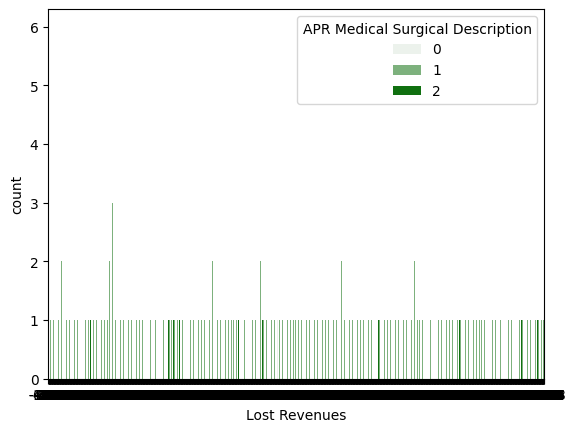

In [ ]:
ax=sns.countplot(x='Lost Revenues',hue='APR Medical Surgical Description', data= df , color='green')

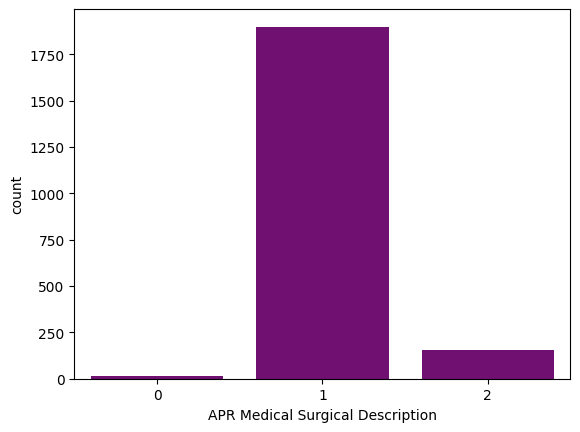

In [ ]:
ax=sns.countplot(x='APR Medical Surgical Description',data=df ,color='purple')

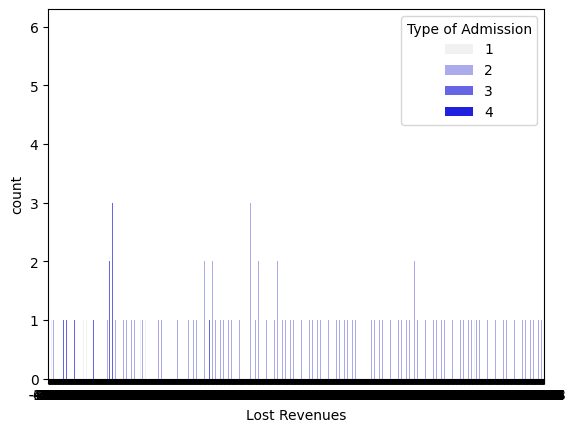

In [ ]:
ax=sns.countplot(x='Lost Revenues',hue='Type of Admission', data= df , color='blue')

Multiple Linear Regression




In [ ]:
X = df.drop('Lost Revenues', axis=1)
Y = df['Lost Revenues']

In [ ]:
X.columns

Index(['Age Group', 'Gender', 'Length of Stay', 'Type of Admission',
       'APR Severity of Illness Code', 'APR Medical Surgical Description',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

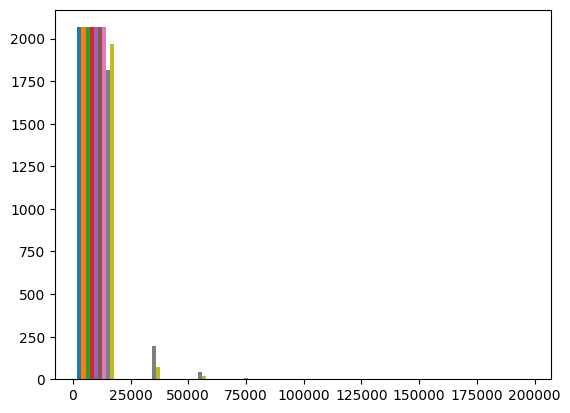

In [ ]:
plt.hist(X)
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [ ]:
train_X, valid_X, train_Y, valid_Y= train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
re_LR=LinearRegression()
re_LR.fit(train_X, train_Y)

LinearRegression()

In [ ]:
re_LR.intercept_

-0.38398389622943796

In [ ]:
re_LR.coef_

array([ 2.04803087e-03,  3.09671281e-02,  4.75341683e-04, -4.48184022e-02,
        1.17902555e-02, -6.93320188e-02,  9.20976456e-02,  9.99996119e-01,
       -9.99993955e-01])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
pred_Y=re_LR.predict(valid_X)

In [ ]:
print('Regression model performance evoluation' )
print('r2: ', r2_score(valid_Y, pred_Y))
print('MAE: ', mean_absolute_error(valid_Y, pred_Y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_Y, pred_Y)))
print('Max_error: ', max_error(valid_Y, pred_Y))

Regression model performance evoluation
r2:  0.9999999747481707
MAE:  0.49940345217401017
RMSE:  0.5012198347301949
Max_error:  0.6841604199792073


In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Lost Revenues   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.208e+10
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        04:11:12   Log-Likelihood:                -1500.6
No. Observations:                2066   AIC:                             3021.
Df Residuals:                    2056   BIC:                             3077.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Simple Linear Regression

In [ ]:
df = df.drop(['Age Group',	'Gender',	'Length of Stay','APR Severity of Illness Code'],axis=1)

In [ ]:
df = df.drop(['APR Medical Surgical Description',	'Emergency Department Indicator',	'Total Charges',	'Total Costs'],axis=1)

In [ ]:
X = df.drop('Lost Revenues', axis=1)
Y = df['Lost Revenues']

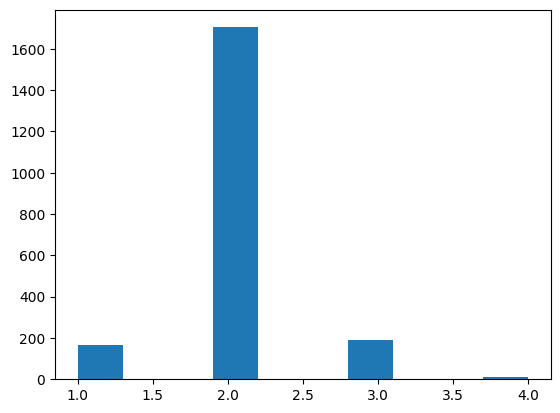

In [ ]:
plt.hist(X)
plt.show()

In [ ]:
train_X, valid_X, train_Y, valid_Y= train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
re_LR1=LinearRegression()
re_LR1.fit(train_X, train_Y)

LinearRegression()

In [ ]:
re_LR1.intercept_

5915.4683982576535

In [ ]:
X.columns

Index(['Type of Admission'], dtype='object')

In [ ]:
re_LR1.coef_

array([-627.36545588])

In [ ]:
print('Regression model performance evoluation' )
print('r2: ', r2_score(valid_Y, pred_Y))
print('MAE: ', mean_absolute_error(valid_Y, pred_Y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_Y, pred_Y)))
print('Max_error: ', max_error(valid_Y, pred_Y))

Regression model performance evoluation
r2:  0.9999999747481707
MAE:  0.49940345217401017
RMSE:  0.5012198347301949
Max_error:  0.6841604199792073


In [ ]:
import statsmodels.api as sm
from scipy import stats

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Lost Revenues   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.55
Date:                Wed, 16 Aug 2023   Prob (F-statistic):           0.000140
Time:                        00:04:42   Log-Likelihood:                -19864.
No. Observations:                2066   AIC:                         3.973e+04
Df Residuals:                    2064   BIC:                         3.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5993.9855    359.09